# Dataset loading and preparation

**Loading data from kaggle**

In [1]:
! pip install -q kaggle

In [2]:
# Upload token files for authentication
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"encrypted789","key":"b6f54ecadd32599477bd0473d09d2884"}'}

In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d 'austinreese/craigslist-carstrucks-data'

 96% 251M/262M [00:02<00:00, 97.4MB/s]
100% 262M/262M [00:02<00:00, 105MB/s] 


In [7]:
# unzip the downloaded dataset
!unzip /content/craigslist-carstrucks-data.zip

Archive:  /content/craigslist-carstrucks-data.zip
  inflating: vehicles.csv            


In [8]:
# Import required external libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

**Load and visualize dataset**

In [20]:
df=pd.read_csv('/content/vehicles.csv')
df

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [22]:
df.columns.values

array(['id', 'url', 'region', 'region_url', 'price', 'year',
       'manufacturer', 'model', 'condition', 'cylinders', 'fuel',
       'odometer', 'title_status', 'transmission', 'VIN', 'drive', 'size',
       'type', 'paint_color', 'image_url', 'description', 'county',
       'state', 'lat', 'long', 'posting_date'], dtype=object)

In [23]:
df.describe()

,id,price,year,odometer,county,lat,long
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


**Cleaning dateset**

In [24]:
# N/A precentage
na_precentage = df.isna().sum() / df.shape[0] * 100
print(na_precentage)

id                0.000000
url               0.000000
region            0.000000
region_url        0.000000
price             0.000000
year              0.282281
manufacturer      4.133714
model             1.236179
condition        40.785232
cylinders        41.622470
fuel              0.705819
odometer          1.030735
title_status      1.930753
transmission      0.598763
VIN              37.725356
drive            30.586347
size             71.767476
type             21.752717
paint_color      30.501078
image_url         0.015930
description       0.016398
county          100.000000
state             0.000000
lat               1.534155
long              1.534155
posting_date      0.015930
dtype: float64


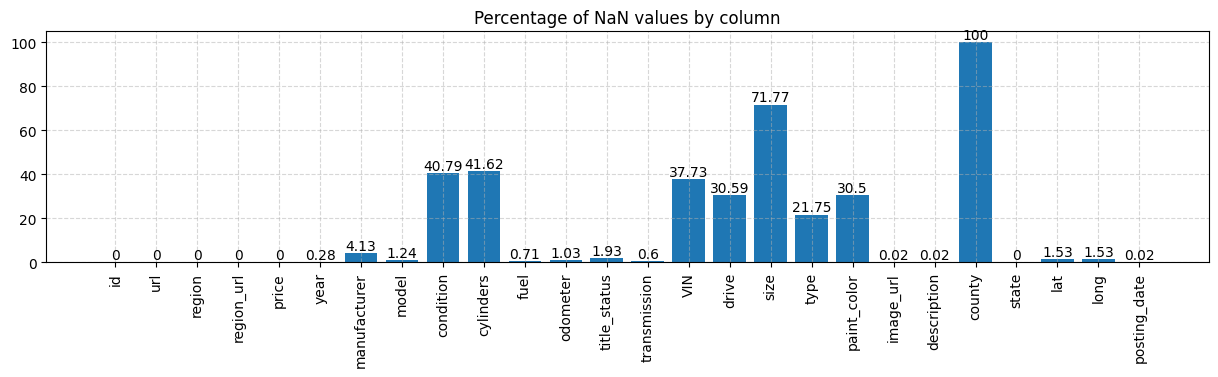

In [25]:
fig, ax = plt.subplots(figsize=[15, 3])
bars = ax.bar(x=df.columns, height=round(na_precentage, 2))
ax.bar_label(bars)
ax.tick_params(axis='x', rotation=90)
ax.tick_params(axis='y')
plt.title("Percentage of NaN values by column")
plt.grid(linestyle="dashed", alpha=0.5)
plt.show()

In [26]:
shape_before_cleaning = df.shape
print(shape_before_cleaning)

(426880, 26)


In [28]:
df.drop(columns="county", inplace=True)

salvage_cars = df[df["condition"] == "salvage"].index
unclean_cars = df[df["title_status"] != "clean"].index

In [29]:
df.dropna(inplace=True)

In [30]:
df.drop(index=salvage_cars, axis=0, inplace=True, errors="ignore")
df.drop(index=unclean_cars, axis=0, inplace=True, errors="ignore")

# Vehicle Attributes Most Influence Price in the Second-hand Market

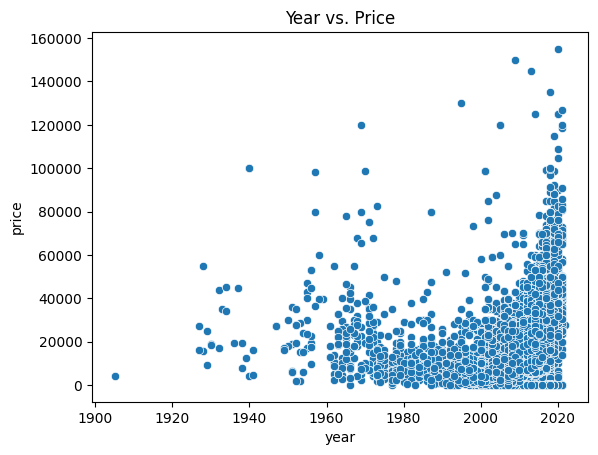

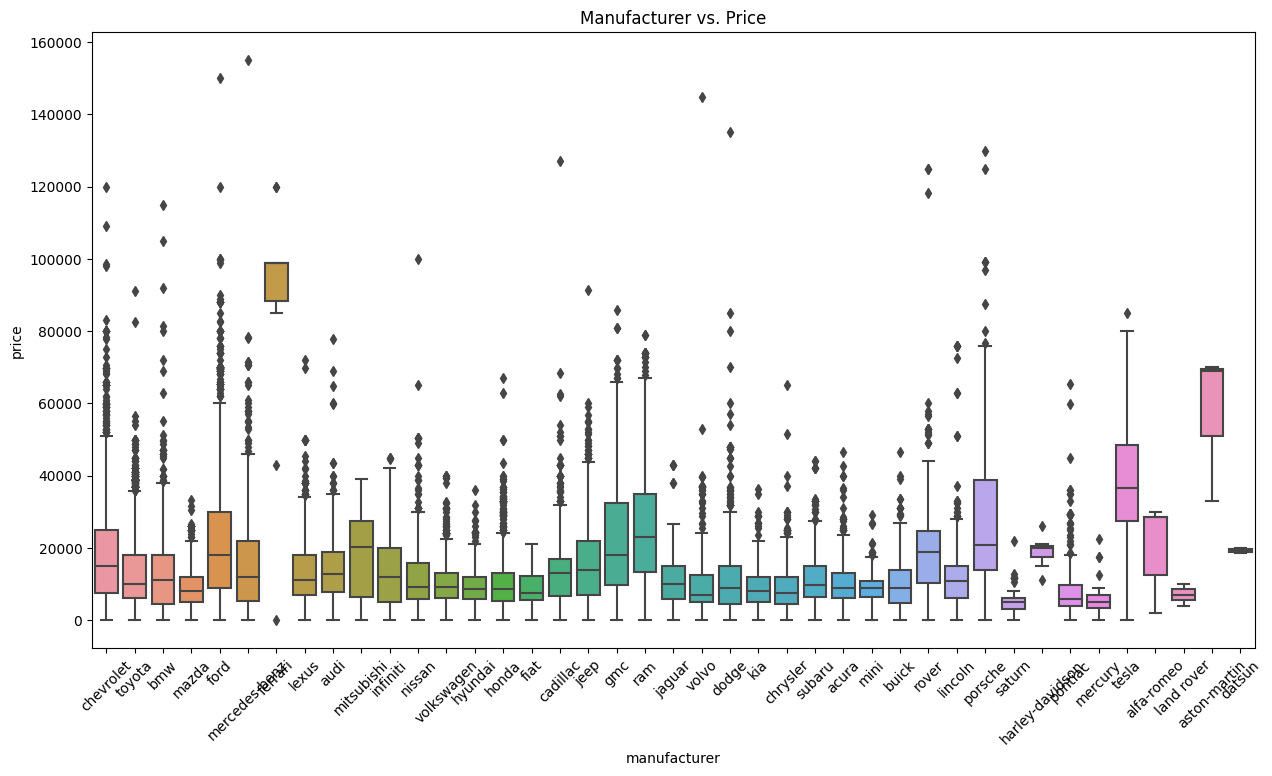

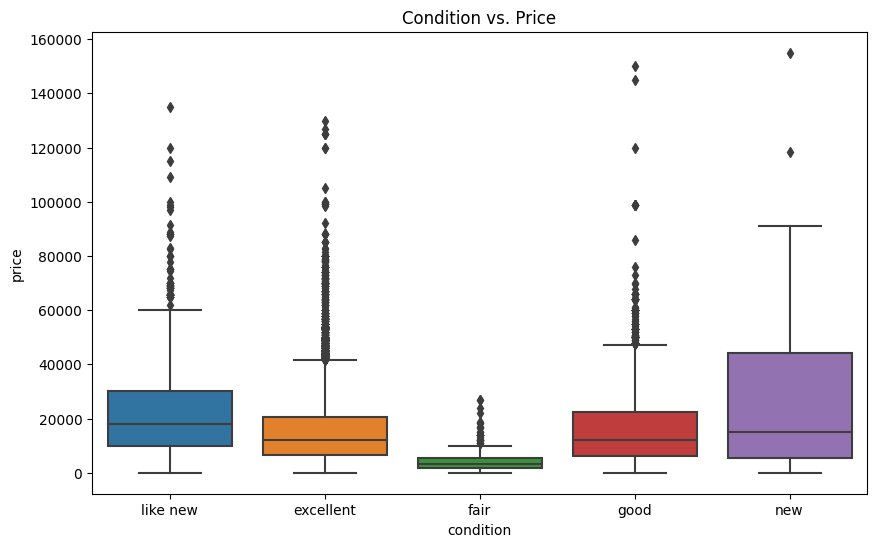

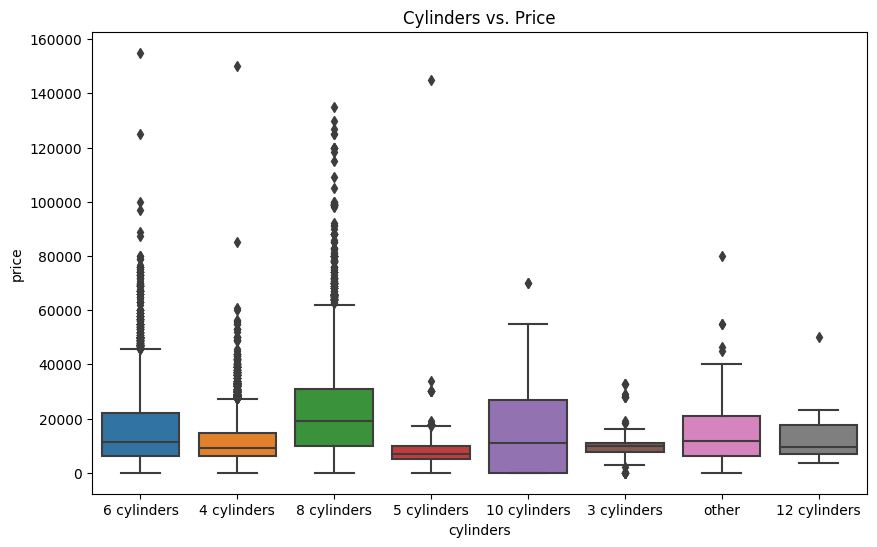

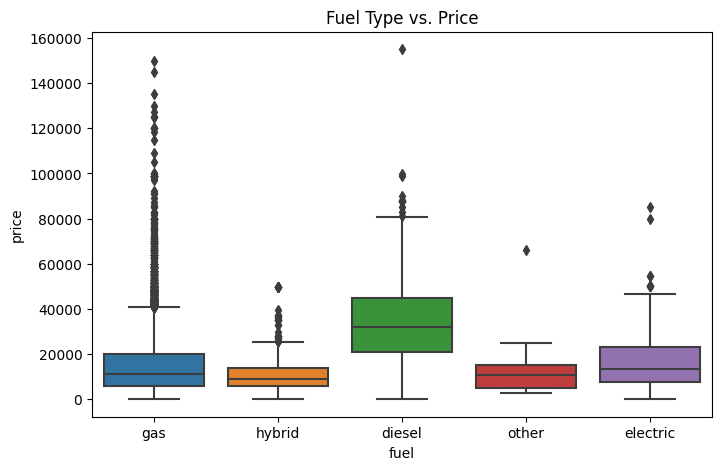

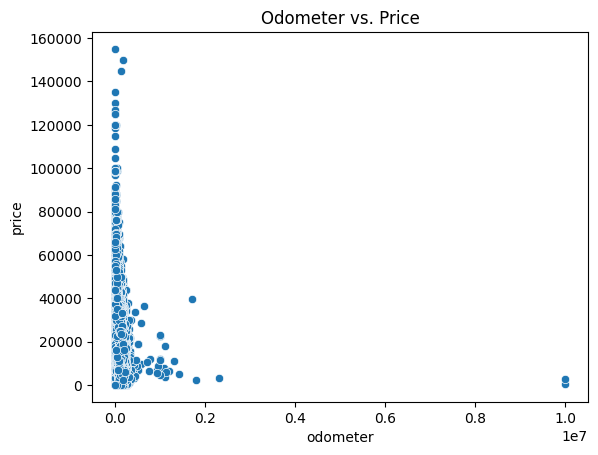

In [39]:
import seaborn as sns

selected_columns = ['price', 'year', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer']

# Create a new DataFrame with only the selected columns
df_selected = df[selected_columns]


# Now, let's explore the relationships between variables and price
# You can use scatter plots, box plots, or other visualizations

# Scatter plot of year vs. price
sns.scatterplot(x='year', y='price', data=df_selected)
plt.title('Year vs. Price')
plt.show()

# Box plot of manufacturer vs. price
plt.figure(figsize=(15, 8))
sns.boxplot(x='manufacturer', y='price', data=df_selected)
plt.title('Manufacturer vs. Price')
plt.xticks(rotation=45)
plt.show()

# Box plot of condition vs. price
plt.figure(figsize=(10, 6))
sns.boxplot(x='condition', y='price', data=df_selected)
plt.title('Condition vs. Price')
plt.show()

# Box plot of cylinders vs. price
plt.figure(figsize=(10, 6))
sns.boxplot(x='cylinders', y='price', data=df_selected)
plt.title('Cylinders vs. Price')
plt.show()

# Box plot of fuel type vs. price
plt.figure(figsize=(8, 5))
sns.boxplot(x='fuel', y='price', data=df_selected)
plt.title('Fuel Type vs. Price')
plt.show()

# Scatter plot of odometer vs. price
sns.scatterplot(x='odometer', y='price', data=df_selected)
plt.title('Odometer vs. Price')
plt.show()


# The Most Popular Car Models traded in the Second-hand Market?

**Car model analysis**

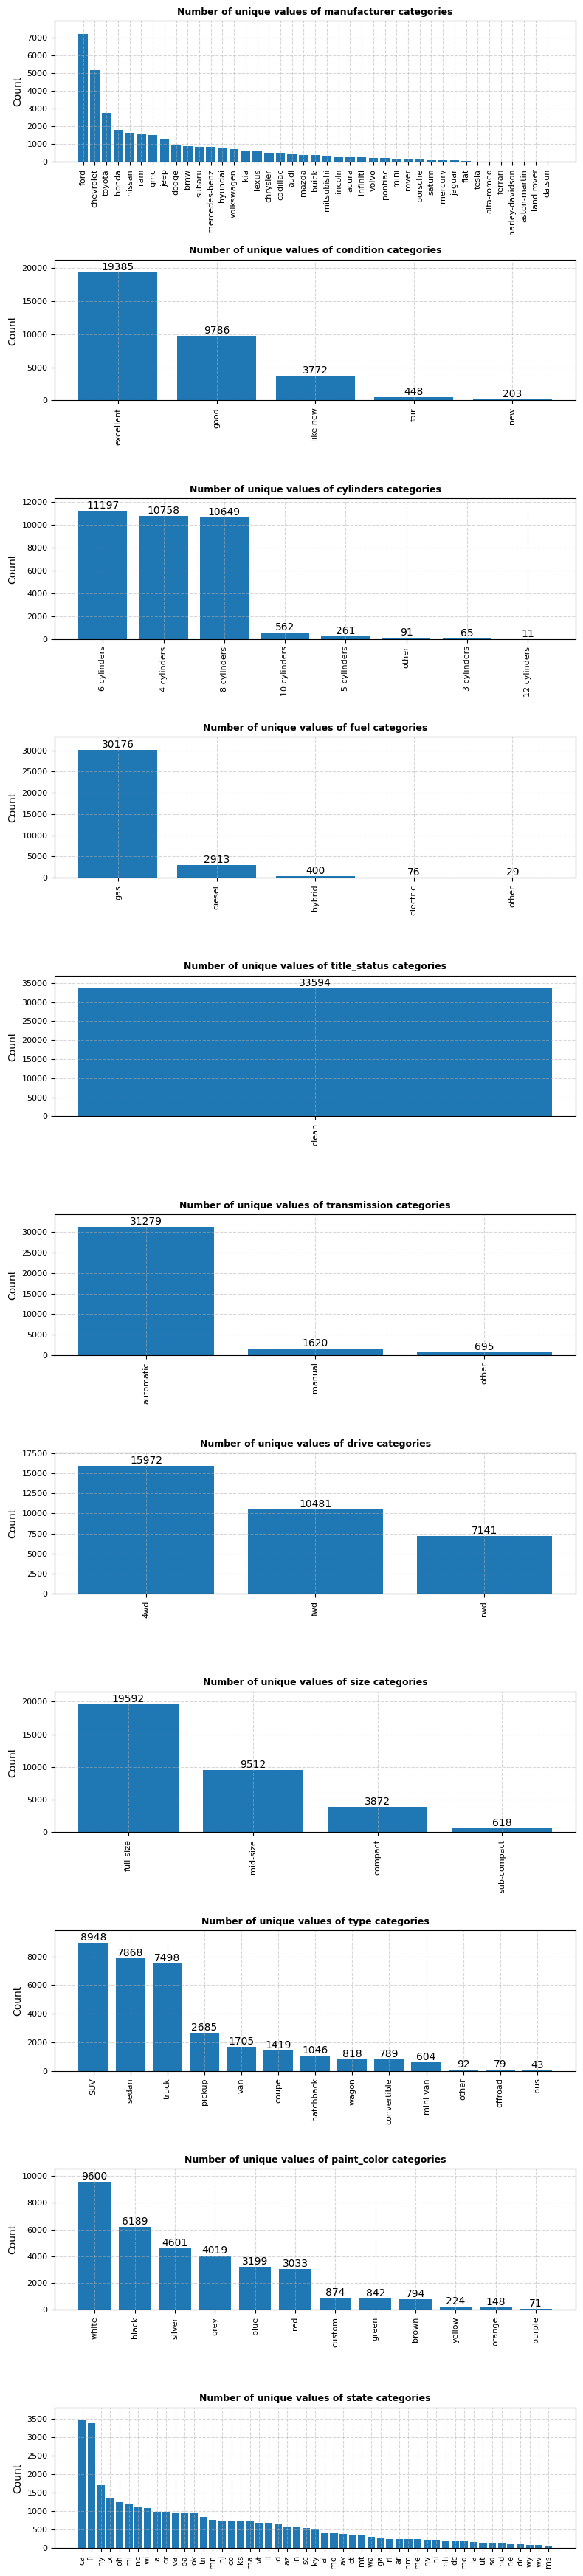

In [31]:
num_col = list(df.select_dtypes(include=["int64", "float64"]).columns)
cat_col = list(df.select_dtypes(include="object").columns)

fig, ax = plt.subplots(11, 1, figsize=[8, 35])
index = 0
for column in cat_col:
    if df[column].nunique() < 100:
        # Bar plot:
        bars = ax[index].bar(x=df[column].value_counts().index,
                             height=df[column].value_counts())

        if df[column].nunique() < 15:
             # Numeric label above each bar (only if few labels)
            ax[index].bar_label(bars)

        # Rotation of axis labels for better visuals
        ax[index].tick_params(axis='x', rotation=90, labelsize= 8)
        ax[index].tick_params(axis='y', labelsize= 8)
        ax[index].set_ylabel('Count')

        # Set the subplot title
        ax[index].set_title(f"Number of unique values of {column} categories", fontdict = {"fontsize": 9, "fontweight": "bold"})

        # Add a grid to the subplot
        ax[index].grid(linestyle="dashed", alpha=0.5)

        ax[index].margins(y=0.1)

        # Increment the subplot index
        index += 1

plt.tight_layout()
plt.show()

Missing values in 'model' column: 0
Top 10 most popular car models:
f-150                   935
silverado 1500          920
1500                    465
sierra 1500             327
2500                    326
silverado 2500hd        293
sierra 2500hd           247
super duty f-550 drw    247
escape                  242
tacoma                  241
Name: model, dtype: int64


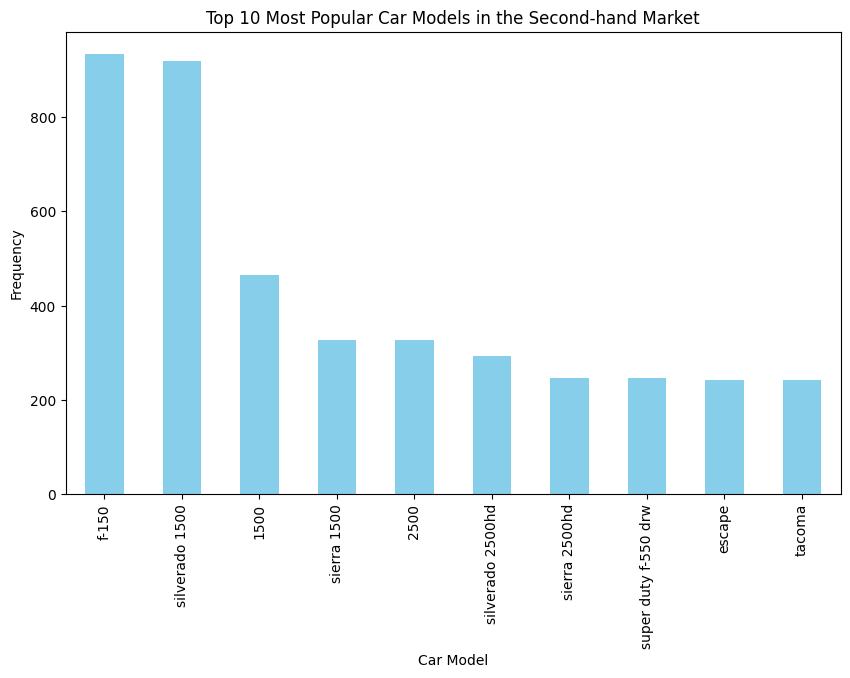

In [32]:
print("Missing values in 'model' column:", df['model'].isnull().sum())

# Replace missing values in the 'model' column with a placeholder if necessary
# For example, replace NaN values with 'Unknown'
df['model'].fillna('Unknown', inplace=True)

# Count the frequency of each car model in the dataset
model_counts = df['model'].value_counts()

# Display the top 10 most popular car models
print("Top 10 most popular car models:")
print(model_counts.head(10))

# Plot the top N most popular car models (you can adjust N based on your preference)
import matplotlib.pyplot as plt

N = 10
plt.figure(figsize=(10, 6))
model_counts.head(N).plot(kind='bar', color='skyblue')
plt.title('Top {} Most Popular Car Models in the Second-hand Market'.format(N))
plt.xlabel('Car Model')
plt.ylabel('Frequency')
plt.show()

# Does Geographic Location Affect Used Car Prices?

**The average price and sum of listings per state**

In [33]:
state_counts=df.groupby('state').agg(
num_listings=('state','size'),
avg_price=('price','median'))

state_counts.reset_index(inplace=True)
state_counts['state'] = state_counts['state'].str.upper()
state_counts

,state,num_listings,avg_price
0,AK,381,24999.0
1,AL,412,14985.0
2,AR,238,5500.0
3,AZ,582,12925.0
4,CA,3458,11988.0
5,CO,731,10988.0
6,CT,357,6900.0
7,DC,178,7997.0
8,DE,110,21745.0
9,FL,3378,9991.0


**Create a map of median price of cars by state**

In [34]:
import plotly.graph_objs as go
from plotly.offline import iplot

# define a data object and a colorscale
data = dict(type='choropleth',
            locations=state_counts['state'],
            locationmode="USA-states",
            z=state_counts['num_listings'],
            text=state_counts['state'],
            colorbar={'title': 'Price'},
            colorscale=[[0, 'rgb(31,125,180)'],
                        [0.1, 'rgb(51,160,44)'],
                        [0.50, 'rgb(255,255,20)'],
                        [1, 'rgb(210,26,28)']],
            reversescale = False)

# define a layout object
layout = dict(title='Median price of cars listed on craigslist by state',
              autosize=False,
              width=800,
              height=800,
              geo=dict(showframe=True, scope ="usa"))

car_map = go.Figure(data=[data], layout=layout)
iplot(car_map, validate=False)

**Create a map of number of cars by state**

In [35]:
count_map = dict(type='choropleth',
                 locations=state_counts['state'],
                 locationmode="USA-states",
                 z=state_counts['num_listings'],  # update to use 'num_listings' column
                 text=state_counts['state'],
                 colorbar={'title': 'Number of Listings'},  # update colorbar title
                 colorscale=[[0, 'rgb(31,125,180)'],
                             [0.1, 'rgb(51,160,44)'],
                             [0.50, 'rgb(255,255,20)'],
                             [1, 'rgb(210,26,28)']],
                 reversescale=False)

layout = dict(title='Number of listings of cars on Craigslist by state',  # update title
              autosize=False,
              width=800,
              height=800,
              geo=dict(showframe=True, scope="usa"))

car_count_map = go.Figure(data=[count_map], layout=layout)
iplot(car_count_map, validate=False)

**Percentage of postings for each state is electric cars**

In [36]:
# Filter the dataframe for electric cars
electric_cars = df[df['fuel'] == 'electric']

# Group the data by state and count occurrences
state_counts = electric_cars['state'].value_counts()

# Calculate the total number of electric cars
total_electric_cars = state_counts.sum()

# Calculate the percentage of electric cars in each state
state_percentages = (state_counts / total_electric_cars) * 100

# Display the result
print(state_percentages)

ca    22.368421
or    13.157895
wa    11.842105
co     6.578947
hi     6.578947
in     3.947368
ma     3.947368
az     3.947368
id     2.631579
ia     2.631579
fl     2.631579
oh     2.631579
vt     2.631579
ks     2.631579
il     1.315789
md     1.315789
dc     1.315789
nc     1.315789
nj     1.315789
ny     1.315789
ct     1.315789
pa     1.315789
tx     1.315789
Name: state, dtype: float64
